In [1]:
from pyDataverse.api import NativeApi, DataAccessApi
from pyDataverse.models import Dataverse
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_url = 'https://data.aussda.at/'
api = NativeApi(base_url)
data_api = DataAccessApi(base_url)

In [3]:
# Bacher, Johann; Beham-Rabanser, Martina; Grausgruber, Alfred; Haller, Max; Höllinger, Franz; Muckenhuber, Johanna; Prandner, Dimitri; Verwiebe, Roland, 2018, "Social Survey Austria 2016", https://doi.org/10.11587/EHJHFJ, AUSSDA, V3, UNF:6:PsmEBlcLmwtj1jV8CSQXlQ== [fileUNF]
# https://doi.org/10.11587/EHJHFJ
DOI = "doi:10.11587/EHJHFJ"
dataset = api.get_dataset(DOI)

In [4]:
files_list = dataset.json()['data']['latestVersion']['files']

In [5]:
for file in files_list:
     filename = file["dataFile"]["filename"]
     file_id = file["dataFile"]["id"]
     print("File name {}, id {}".format(filename, file_id))

File name 10007_co_de_v1_0.pdf, id 181
File name 10007_da_de_v1_2-1.tab, id 188
File name 10007_da_de_v1_2.tab, id 189
File name 10007_da_de_v1_2.zsav, id 187
File name 10007_mr_de_v1_0.pdf, id 182
File name 10007_om1_de_v1_0.pdf, id 177
File name 10007_om2_de_v1_0.pdf, id 178
File name 10007_om3_de_v1_0.pdf, id 179
File name 10007_om4_de_v1_0.tab, id 186
File name 10007_qu_de_v1_0.pdf, id 180


In [6]:
response = data_api.get_datafile("189")

In [7]:
# cannot access file as csv table as it seems to be type byte
# todo: transformation to csv file is missing
# workaround: next lines run on upload file

In [8]:
dat = pd.read_csv("socialsurveyaustria2016oa.csv", sep='\t', index_col=0)
dat.head()

,doi,NR_2016,ISSP_Version,Gewicht_DES,Gewicht_POS,Gewicht_GES,SEX_2016,af1,af5,bf14,...,Matura,city,Matura_vater,Matura_mutter,Nationalitaet,Geburtsland,Partnerschaft,Matura_partner,Messgang,Wohnverhaeltnis
version,,,,,,,,,,,,,,,,,,,,,
1.2 (2018-03-26),doi:10.11587/EHJHFJ,1172,2,1.28212,0.80073,1.15048,1,1,-1,1,...,1,1,1,1,1,1,2,1,0,1
1.2 (2018-03-26),doi:10.11587/EHJHFJ,1857,2,0.38161,0.80682,0.20884,2,1,10,1,...,2,1,2,2,1,1,3,-99,4,0
1.2 (2018-03-26),doi:10.11587/EHJHFJ,1946,2,0.41640,0.95263,0.37300,1,1,15,1,...,2,2,2,2,0,0,3,-99,5,0
1.2 (2018-03-26),doi:10.11587/EHJHFJ,1102,2,1.28212,0.92258,1.30632,2,4,1,1,...,1,1,1,1,1,1,1,1,5,2
1.2 (2018-03-26),doi:10.11587/EHJHFJ,1352,2,0.41640,0.86337,0.43237,2,1,-1,1,...,1,1,0,1,1,1,1,0,4,1


In [9]:
# Sind Sie insgesamt betrachtet mit Ihrem Leben sehr zufrieden, eher zufrieden, eher weniger zufrieden, nicht zufrieden, keine Angabe
dat["cf55"].mean()
# Mean falsch, weil missing nicht definiert. Das gilt auch für weitere Analysebeispiele

1.6590796635329046

In [10]:
dat["cf55"].value_counts()

2    994
1    881
3    124
4     16
8      6
Name: cf55, dtype: int64

<AxesSubplot:>

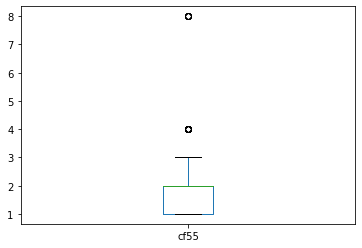

In [11]:
dat["cf55"].plot.box()